# **Contextualização**

A limpeza dos dados, também chamada de **data cleaning**, ou mesmo data cleansing, consiste principalmente em tratar dados corrompidos ou inacurados, proveniente de erros, como por exemplo erros e gravação dos dados.

A estruturação ou manipulação dos dados, também chamada de **data wrangling** ou data munging, consiste em todo processo de transformação dos dados para a melhor estrutura possível para análise e modelagem dos dados.

Como o contexto do data wrangling é mais geral, podemos dizer que data cleaning é uma parte (com um foco em identificação e removação de erros) dentro do data wrangling, que é o processo geral para estruturar nossos dados de forma que possamos atingir nosso objetivo.

&nbsp;

---

&nbsp;

**O que os alunos devem esperar deste módulo?**

Neste módulo, dentro do contexto do data cleaning e data wrangling, aprenderemos:
- Como identificar e lidar com valores faltantes
- Como identificar e lidar com outliers
- Como identificar e lidar com dados inconsistentes através de análise univariada
- Como identificar variáveis potencialmente importantes para o modelo através da análise multivariada
- Como transformar seus dados numéricos e categóricos para aplicação do modelo
- Como estruturar os seus dados para seu objetivo final
- Como criar novas variáveis para o modelo
- Como estruturar um pipeline pré-tratamento dos dados

&nbsp;

---

&nbsp;

**O que esperamos dos alunos neste módulo?**

Esperamos que o aluno exerça a habilidade de **abstração** do que for ensinado enste módulo. A capacidade de abstrair um conteúdo, neste contexto, é ser capaz de utilizar o conteúdo aprendido neste módulo para outros contextos, outras bases de dados

**Tudo o que for ensinado neste módulo pode ser aplicado em diversos contextos e bases de dados diferentes.** Contudo, uma vez que temos alunos de distintos backgrounds, não é possível utilizar uma base de dados que contemple todas áreas, ou mesmo cada conteúdo deste módulo.

Outro ponto importante é o que aluno pratique o conteúdo aqui aprendido em seus próprios dados, em dados públicos, e que levante suas dúvidas para os mentores do curso sempre que necessário.

# Setup

In [42]:
# instalando dependencias
!pip install sidetable
!pip install pandas-profiling==3.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.3.0
    Uninstalling pandas-profiling-3.3.0:
      Successfully uninstalled pandas-profiling-3.3.0


In [43]:
import numpy as np
import pandas as pd

# Exibição de dados
import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno # facilita a plotagem de dados faltantes
from ipywidgets import interact, widgets # mostra de forma iterativa os dados

# Carregar alguns dados
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

ImportError: ignored

In [ ]:
# Configurando um padrão de formato de figura
sns.set_theme(
    context= 'talk',
    style = 'ticks',
    font_scale =.8,
    rc={'figure.figsize': (12,8)}
)

In [ ]:
# Iniciando a função de lista de atributos
def list_attributes(obj):
  """Lista atributos e funções de um objeto"""
  return [attr for attr in obj.__dir__() if not attr.startswith('_')]

# **Bibliotecas facilitadoras de EDA**

Bibliotecas de "Auto EDA" que também facilitam na identificação de elementos para limpeza dos dados:

- [pandas-profiling](https://pandas-profiling.ydata.ai/docs/master/index.html)
- [dataprep](https://dataprep.ai/)
- [sweetviz](https://pypi.org/project/sweetviz/)
- [lux](https://lux-api.readthedocs.io/en/latest/source/getting_started/overview.html)

In [ ]:
# Lendo a biblioteca do Titanic
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Usando a biblioteca do pandas profile para mostrar de forma estilizada as informações
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

# Valores Duplicados

In [ ]:
# Identificar os valores duplicados
# dessa forma ele vai considerar todos os valores como duplicados
# a soma vai retornar a quantidade de True dentro da tabela
df.duplicated(keep=False).sum()


107

In [ ]:
# Mostrando na tabela
df[df.duplicated(keep=False)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
var_listColunas = df.columns.to_list()
var_listColunas

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [ ]:
# Identificar quantos valores duplicados há em em cada duplicata
# df.columns quer dizer que vai ser em todas as colunas
# size retorna quantas vezes essas linhas unicas aperecem no código
# to frame vai retornar o data frame e n_duplicates vai retornar as linhas unicas
# dropna = false é para mostrar todas as informações, isso é pouco usado, as vezes não vai precisar


(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending= False)
 .head(5)
)

n_duplicates
survived pclass sex    age sibsp parch fare   embarked class  who   adult_male deck embark_town alive alone              
0        3      male   NaN 0     0     7.8958 S        Third  man   True       NaN  Southampton no    True             13
                                       8.0500 S        Third  man   True       NaN  Southampton no    True             12
                                       7.7500 Q        Third  man   True       NaN  Queenstown  no    True              8
1        3      female NaN 0     0     7.7500 Q        Third  woman False      NaN  Queenstown  yes   True              7
0        2      male   NaN 0     0     0.0000 S        Second man   True       NaN  Southampton no    True              6

Com isso já podemos fazer algumas analises e uma coisa a se lembrar é que ao repetir variáveis float é muito provável que seja um valor duplicado.

In [ ]:
# Remover valores duplicados
# Sub set é informar que queremos que nessas colunas seja removido as duplicadas
# no caso da idade podemos deixar os valores duplicados

# df.drop_duplicates(subset= ['age'])

df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#tratando valores nulos

A maioria dos modelos de machine learning não conseguem trabalhar com valores faltantes, de forma que temos que tratá-los antes de aplicar os modelos.

As duas abordagens mais comuns para tratamento de nulos é:
- Removê-los
- Imputá-los

Para remover os nulos, podemos remover as observações (ou seja, linhas) onde há valores nulos, assim perdendo a observação como um todo, ou, ainda remover a variável (coluna) como muitos valores faltantes, perdendo assim por completo a variável.

Esta abordagem de remoção de nulos costuma ser viável quando temos um dataset grande e com poucos valores nulos, de forma que a remoção de algumas linhas com valores nulos não impacta na acurácia do modelo que desejamos utilizar.

In [ ]:
#@title
%%html
<style>
div.warn {
    color: #FE4754;
    background-color: #FFE1E3;
    border-left: 5px solid #FE4754;
    padding: 0.5em;
    }
 </style>
<div class=warn>
<b>Sempre se questione do motivo dos nulos!</b><br/><br/>
<div style="color: black">
Como cientista de dados, não podemos simplesmente remover observações sem entender o motivo dos nulos:
<li> É decorrente de erro?</li>
<li> Pode significar algum valor? (neste caso faríamos uma imputação)</li>
<li> Existe algum padrão nestes valores com nulos? (exemplo, ausente apenas para determinado grupo)</li>
</div>
</div>

Para a outra alternativa, a imputação de valores nulos, simplesmente preenchemos os valores nulos por algum valor determinado pelo próprio cientista, possivelmente com insight de uma pessoa de negócios.

Esse valor pode ser a média, mediana, moda ou outra métrica de agregação da coluna em questão. Também pode ser zeros, no caso de coluna numérica, ou uma categoria diferente como "OUTROS", no caso de colunas categóricas.

In [ ]:
# Load titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Identificando valores Nulos

In [ ]:
# identificar realtivamente
df.isna().sum()/891*100
# ou
# Shape retorna o numero de linhas
df.isna().sum()/df.shape[0]*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
# Identificar os valores nulos
# Join vai unificar usando uma coluna em comun dos 2

df_missing = (
     df.isna().sum()
    .to_frame("missing_Count")
    .join((df.isna().sum()/df.shape[0]).to_frame('Missing_pct'))
    .sort_values('missing_Count', ascending= False)
)


# passando a função format que podemos usar para melhorar a apresentação do modelo
# 2% quer dizer duas casas decimais para o porcentagem, subset quer falar quem vamos alterar
df_missing.style.format('{:.2%}', subset='Missing_pct')

,missing_Count,Missing_pct
deck,688,77.22%
age,177,19.87%
embarked,2,0.22%
embark_town,2,0.22%
survived,0,0.00%
pclass,0,0.00%
sex,0,0.00%
sibsp,0,0.00%
parch,0,0.00%
fare,0,0.00%


In [ ]:
# Método de sintese em cadeia - mesma coisa, mas realizando de forma mais rápida
# Lambda necessário  pois estamos nos referenciando a própria função, o X no caso vira a variável

df.isna().sum().to_frame('missing_count').assign(missing_pct = lambda x: x.div(len(df))).sort_values('missing_count', ascending=False)

,missing_count,missing_pct
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


Usando a biblioteca Sidetable

In [ ]:
# A side table vai mostrar uma tabela como fizemos antes, mas de forma automática

df.stb.missing()

,missing,total,percent
deck,688,891,77.216611
age,177,891,19.865320
embarked,2,891,0.224467
embark_town,2,891,0.224467
survived,0,891,0.000000
pclass,0,891,0.000000
sex,0,891,0.000000
sibsp,0,891,0.000000
parch,0,891,0.000000
fare,0,891,0.000000


Usando a biblioteca missgno

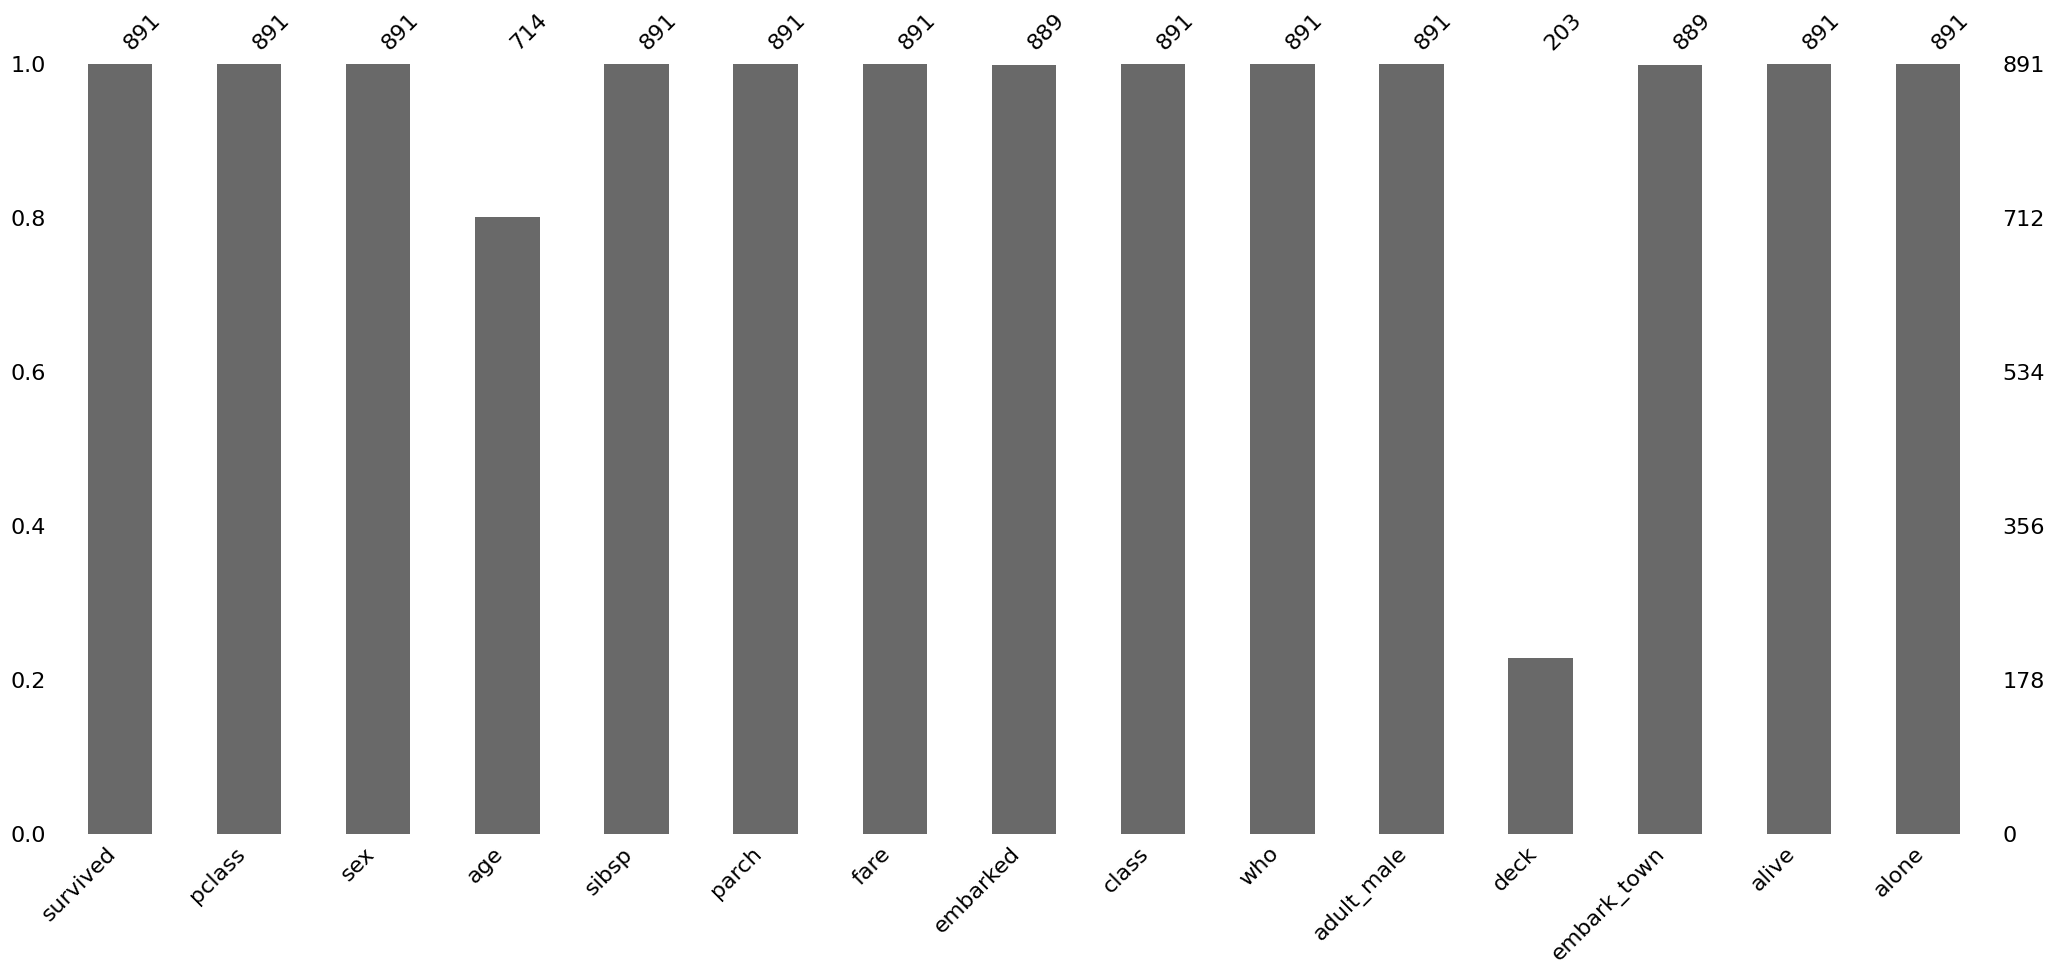

In [ ]:
# essa biblioteca tem outros tipos de gráficos a serem usados
# bar, heatmap, matrix e por ai vai

msno.bar(df);

mostrando as linhas com valores faltantes como um todo

In [ ]:
# Se pelo mesnos existe 1 valor nulo na linha
df[df.isna().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


mostrando as linhas com valores faltantes na coluna embarked

In [ ]:
df[df.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


#Removendo valores nulos


In [ ]:
# Removendo os nulos
# Nesse caso em específico vale mais a pena remover a coluna Deck do que retirar seus valores nulos
# Pois se dermos o  # df.dropna(subset=['deck']) vamos perder muitas linhas do nosso dataset

df.drop(columns=['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# Valor máximo de NAs permitido
max_nan_freq = 0.7
# Identificando as colunas
# .div quer dizer divisão, só que sem a /
na_cols =df.isna().sum().div(len(df))

# Consultando que colunas passam o máximo permitido
cols2_drop = na_cols[na_cols>max_nan_freq].index
print(cols2_drop)


# Dropando esse coluna com muito Nas
df.drop(columns=cols2_drop)


Index(['deck'], dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# Dropando a coluna com inplace - modificando a tabela
df.drop(columns=cols2_drop, inplace=True)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


#imputando valores Nulos - substituindo

In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


Imputando valores em uma coluna específica valor passado

In [ ]:
df.age.fillna(0).tail().reset_index()


,index,age
0,886,27.0
1,887,19.0
2,888,0.0
3,889,26.0
4,890,32.0


Imputando valores nulos como media, moda ou mediana

In [ ]:
df.fillna({'age': df.age.mean(), 'embarked': df.embarked.mode()[0]}).tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,Queenstown,no,True


imputando valores nulos com valores passados, futuros, ou via interpolação

In [ ]:
# Nesse caso estamos passando para preencher o valore que está para trás, uma copia
df.fillna(method='bfill').tail()

# Nesse caso estamos passando para preencher o valore que está para frente, uma copia
df.fillna(method='ffill').tail()

# Interpolação coloca como se fosse uma regressão linear entre os valores que estavam antes e depois
df.age.interpolate().tail()

886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: age, dtype: float64

In [ ]:
# Mostrando a diferença entre todos os métodos

(
 df
 .assign(age_bfill = df.age.bfill(),
         age_ffill = df.age.ffill(),
         age_interpolate = df.age.interpolate())
 .filter(like='age')
 .tail()
 .style.highlight_null()
)

,age,age_bfill,age_ffill,age_interpolate
886,27.000000,27.000000,27.000000,27.000000
887,19.000000,19.000000,19.000000,19.000000
888,nan,26.000000,19.000000,22.500000
889,26.000000,26.000000,26.000000,26.000000
890,32.000000,32.000000,32.000000,32.000000


In [ ]:
# Imputando Nas por grupo
# nesse exemplo seria se caso houver uma relação entre idade e sexo, por isso estamos agrupando
# Com isso, fica a media de idade por cada sexo, ou seja, a media se masculino vai preencher a média dos homens

df.groupby('sex')['age'].apply(lambda x: x.fillna(x.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

# Outliers

Outliers são pontos muito distantes do centro de distribuição dos dados e impactam grande parte das análises e modelos de machine learning.

As causas de outlieres podem ser:
- Erro de mensuração/amostragem
- Outlier natural dos dados

Neste tópico aprenderemos como identificar e tratar outliers, que seja removendo-os ou aplicando transformação.

Cabe ressaltar que outliers naturais dos dados não devem ser removidos levianamente, ou seja, sem antes identificá-los e sem tentar entender seus motivos, se há padrões neste outliers. Uma vez identificado estes outliers e suas possíveis causas, e no caso de não haver problema/interesse em não considerá-los na análise, podemos removê-los.  

Para esta análise, vamos trabalhar com um dataset com vários atributos de vinhos.

In [ ]:
# Carregando um dataset de vinhos do sklearn
df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Identificando/removendo outliers

A maneira mais direta (e simples) de observar um outlier é através do gráfico boxplot:

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

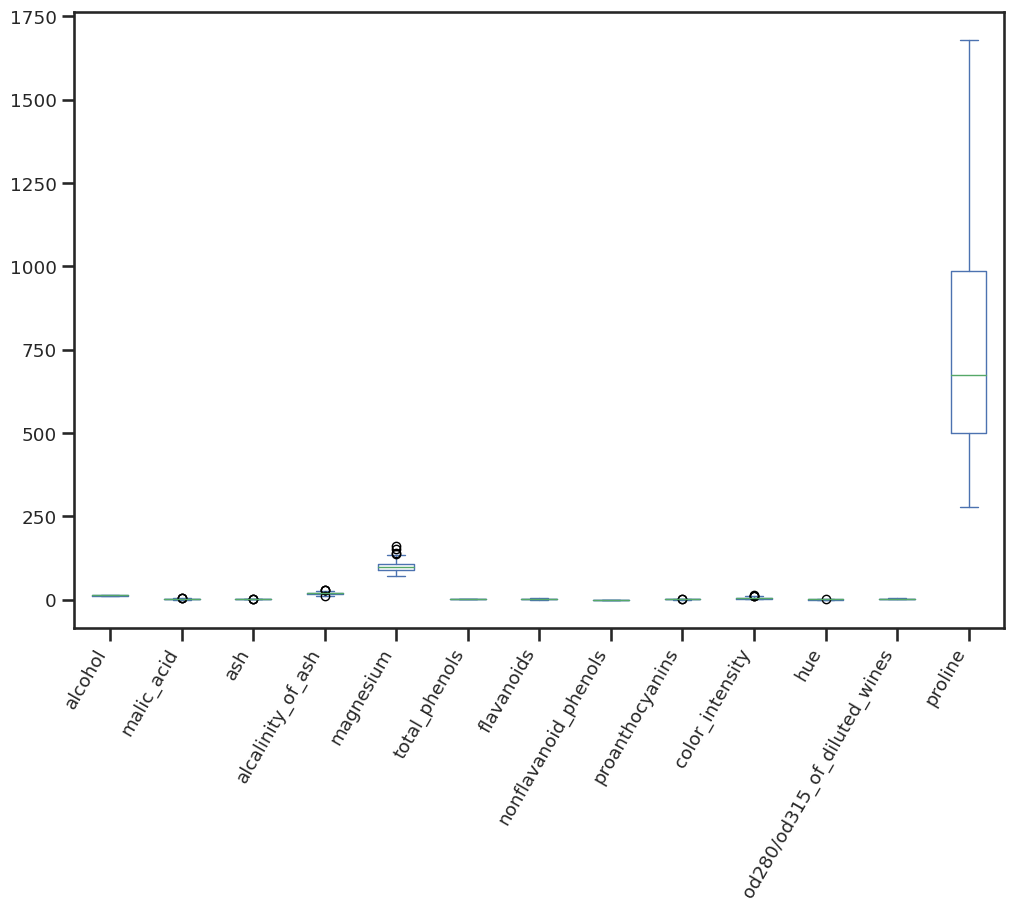

In [ ]:
# Box plot ja pontua quem são os outliers
df.plot.box()
# Customizando o eixo x e deixnado mais bonita a analise
plt.xticks(rotation= 60, ha='right')

Conseguimos observar que há outliers em algumas variáveis, mas devido à diferença de escala entre as variáveis, fica difícil compará-las em um único plot.

Uma alternativa aqui seria plotar separadamente. Contudo, podemos optar também por padronizar estes dados apenas para visualização usando a função `scale` da importada da biblioteca `sklearn.preprocessing`:

In [ ]:
from sklearn.preprocessing import scale

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

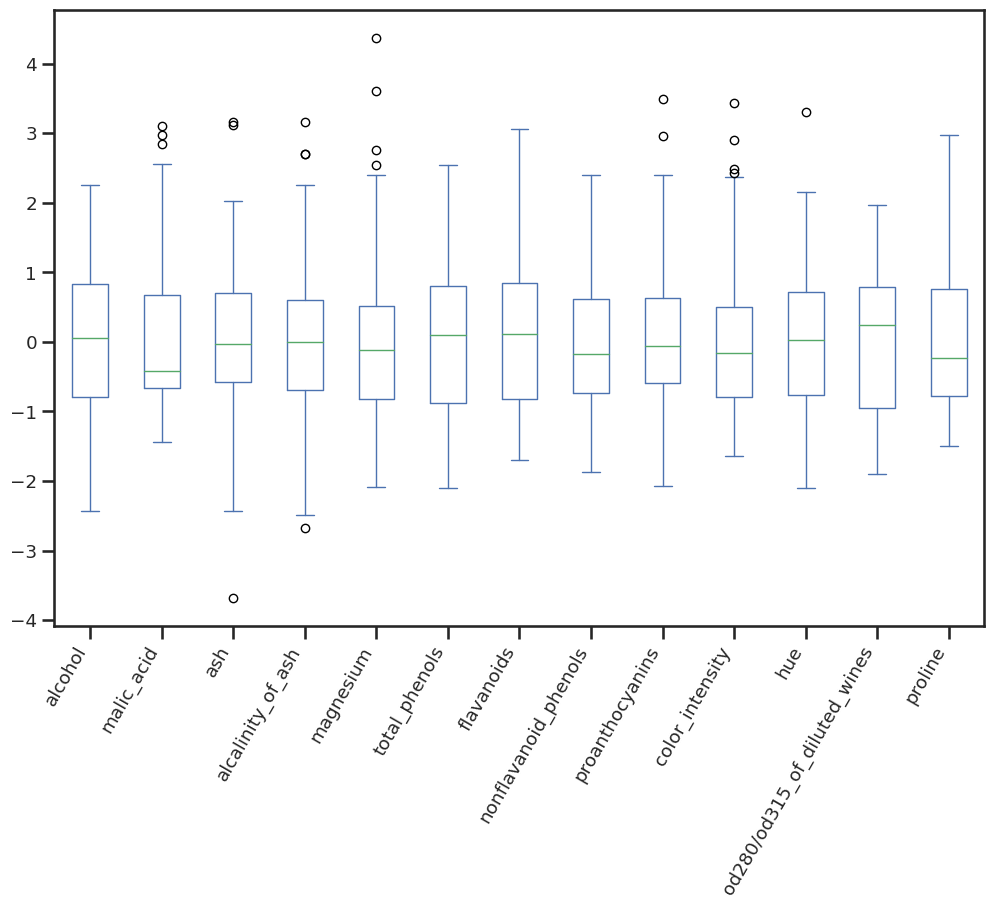

In [ ]:
# Mesma função de antes mas em escala, assim, podemos ver como estão os outliers
df.apply(scale).plot.box()
# Customizando o eixo x e deixnado mais bonita a analise
plt.xticks(rotation= 60, ha='right')


Verificamos que existem outliers, logo, o próximo passo seria identificá-los para verificar se faz sentido ou não. Para isso, discutiríamos com o time de negócios (neste caso, um especialista em vinhos).

Uma vez que este dataset está sendo utilizado para fins didáticos, vamos considerar inicialmente que podemos excluir estes dados, e mais adiante veremos alternativas para prosseguir com a análise mesmo com estes outliers.

#### Interquartile range

Podemos identificar os outliers pelo método interquartil, utilizando a seguinte fórmula:

$$
\text{lower_outlier} = Q1 - 1.5 \times IQR
$$
$$
\text{upper_outlier} = Q3 + 1.5 \times IQR
$$

onde $Q1$ represente o primeiro quartil, $Q3$ o terceiro, e $IQR$ o intervalo interquartil.

Segue abaixo uma possível implementação desta fórmula:

In [ ]:
def is_outlier(array, extreme=False):
  '''Função customizada para identificar outlier'''
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

A função retorna um array booleano do mesmo tamanho do array de entrada, indicando se o valor é ou não um outlier:

In [ ]:
# Mostrando aplicação da função em uma dada coluna
is_outlier(df.ash)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: ash, Length: 178, dtype: bool

In [ ]:
# Quantidade de linha com outlier na coluna
is_outlier(df.ash).sum()

3

E podemos aplicá-la para uma ou mais colunas através do método `apply`:

In [ ]:
# Aplicando para todas as colunas usando o Aplly
df.apply(is_outlier)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Aplicando para todas as colunas usando o Aplly
df.apply(is_outlier).sum().reset_index()

,index,0
0,alcohol,0
1,malic_acid,3
2,ash,3
3,alcalinity_of_ash,4
4,magnesium,4
5,total_phenols,0
6,flavanoids,0
7,nonflavanoid_phenols,0
8,proanthocyanins,2
9,color_intensity,4


Para remover os outliers, podemos ignorar todas linhas que tem pelo menos um `True` para outlier:

In [ ]:
# Removendo os outliers
# Aqui os que não são outliers
df[~df.apply(is_outlier).any(axis=1)]

# Aqui estamos vendo todas as lihsa que são outliers
df[df.apply(is_outlier).any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0


E podemos comparar as distribuições com ou sem remoção de outlier:

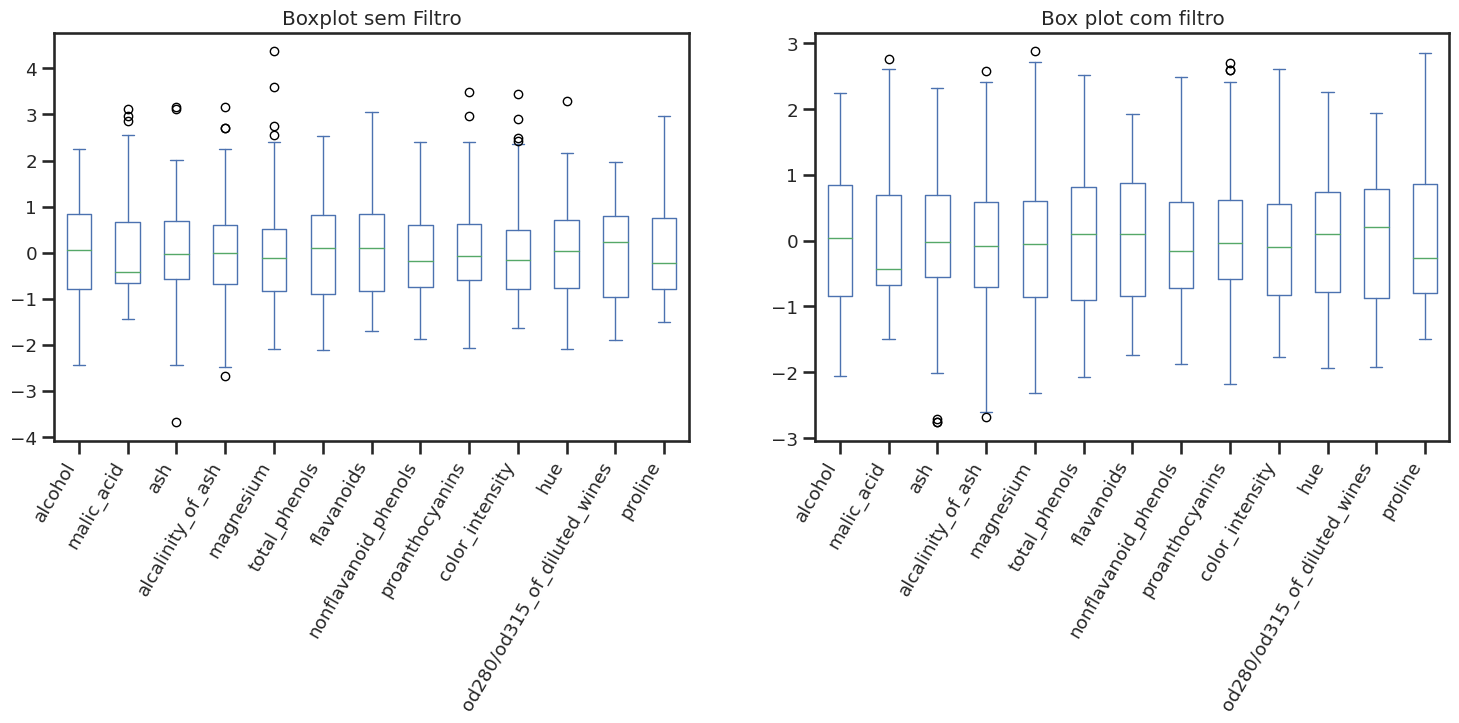

In [ ]:
# Figura lado a lado dos dados originais e padronizados

df_Without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize= (18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem Filtro')
df_Without_outliers.apply(scale).plot.box(ax=axes[1], title='Box plot com filtro')

fig.autofmt_xdate(rotation=60, ha='right')

plt.show()


In [ ]:
df_Without_outliers.apply(is_outlier)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


Observe que, mesmo removendo os outliers, eles diminuem, mas não desapareceram! Por quê?

Ao adicionamos ou removemos valores acabamos modificando a distribuição dos dados, principalmente valores mais distantes do centro da distribuição. Por isso, a remoção de outliers não garante necessariamente que não terá mais outliers na nova distribuição.

Neste caso, por exemplo, valores que previamente não eram outliers passaram a ser. Contudo, tais valores não estão tão distantes como os outliers originais.

#### Z-score

Outro método para identificar e também remover outliers é através da padronização Z-score, em que a média dos valores fica em 0, e o desvio padrão em 1. Usualmente, filtramos valores acima e abaixo de 3 desvios padrões (para cima e para baixo, respectivamente).

Nós já utilizamos o Z-score

In [ ]:
def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3) | (scaled_array>3)

df_Without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

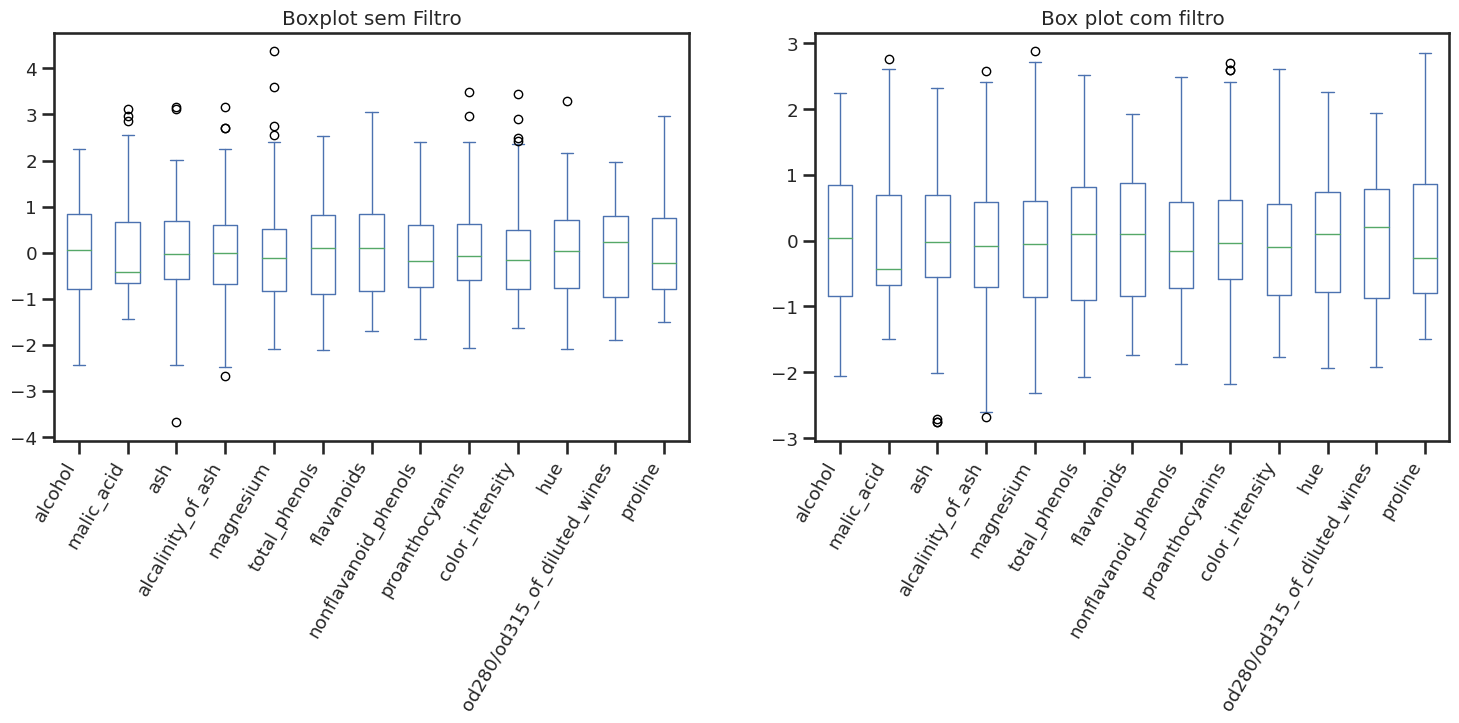

In [ ]:
# Figura lado a lado dos dados originais e padronizados destacando 3 std


df_Without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize= (18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem Filtro')
df_Without_outliers.apply(scale).plot.box(ax=axes[1], title='Box plot com filtro')

fig.autofmt_xdate(rotation=60, ha='right')

plt.show()


### Corrigindo outliers

#### Cap

Um método para lidar com os outliers é substituí-los por um valor que faça sentido, como, por exemplo, substituir todos os valores que são maior do queo percentil 99% (ou seja, top 1% dos valores) pelo valor do percentil 99%.

In [ ]:
# cap vai substituir os valores outliers e colocando valores que fazem sentido
# mostrando percentis

df.describe(percentiles=[0.01, .25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [ ]:
# Função que vai retornar o array com os dados que estão muito fora, passando o menor possível e o maior possível
# nesse padrão esta pegando tudo
def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()

  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)

  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile

  return array

In [ ]:
# mostrando percentis após aplicar a função
# retornando dentra da coluna todos os valores que estão entre os 90%
cap_values(df.ash, upper_quantile=.90)

# retorne o valor máximo até 90%
cap_values(df.ash, upper_quantile=.90).max()

2.7

In [ ]:
df_1 = df.apply(cap_values, upper_quantile=.90)
df_1.describe(percentiles=[0.01, .25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.979719,2.267213,2.354607,19.323596,98.629213,2.265236,1.993056,0.355225,1.549831,4.919775,0.947584,2.594090,735.573034
std,0.777324,0.967287,0.251381,2.997401,11.661305,0.576228,0.937301,0.112427,0.488657,2.017555,0.210867,0.684611,290.789642
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.980900,2.700000,24.000000,118.000000,3.027200,3.230900,0.530000,2.294500,8.509000,1.230900,3.451800,1260.450000
99%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000


#### Transformações

##### Log

In [ ]:
np.log(df.ash)

0      0.887891
1      0.760806
2      0.982078
3      0.916291
4      1.054312
         ...   
173    0.896088
174    0.908259
175    0.815365
176    0.862890
177    1.007958
Name: ash, Length: 178, dtype: float64

<Axes: >

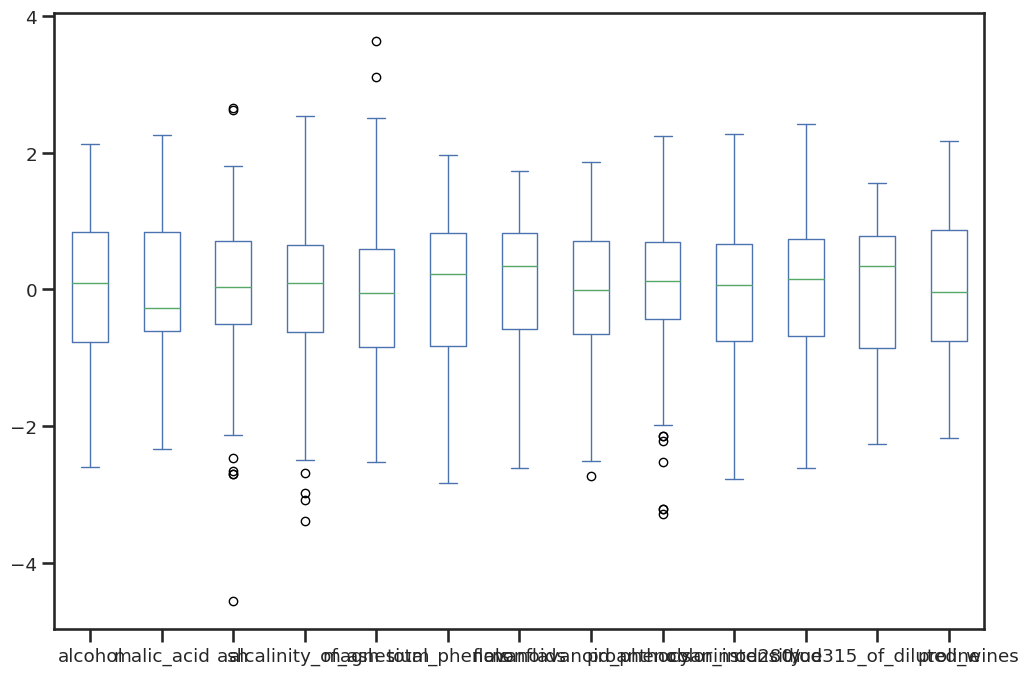

In [ ]:
df.apply(np.log).apply(scale).plot.box()

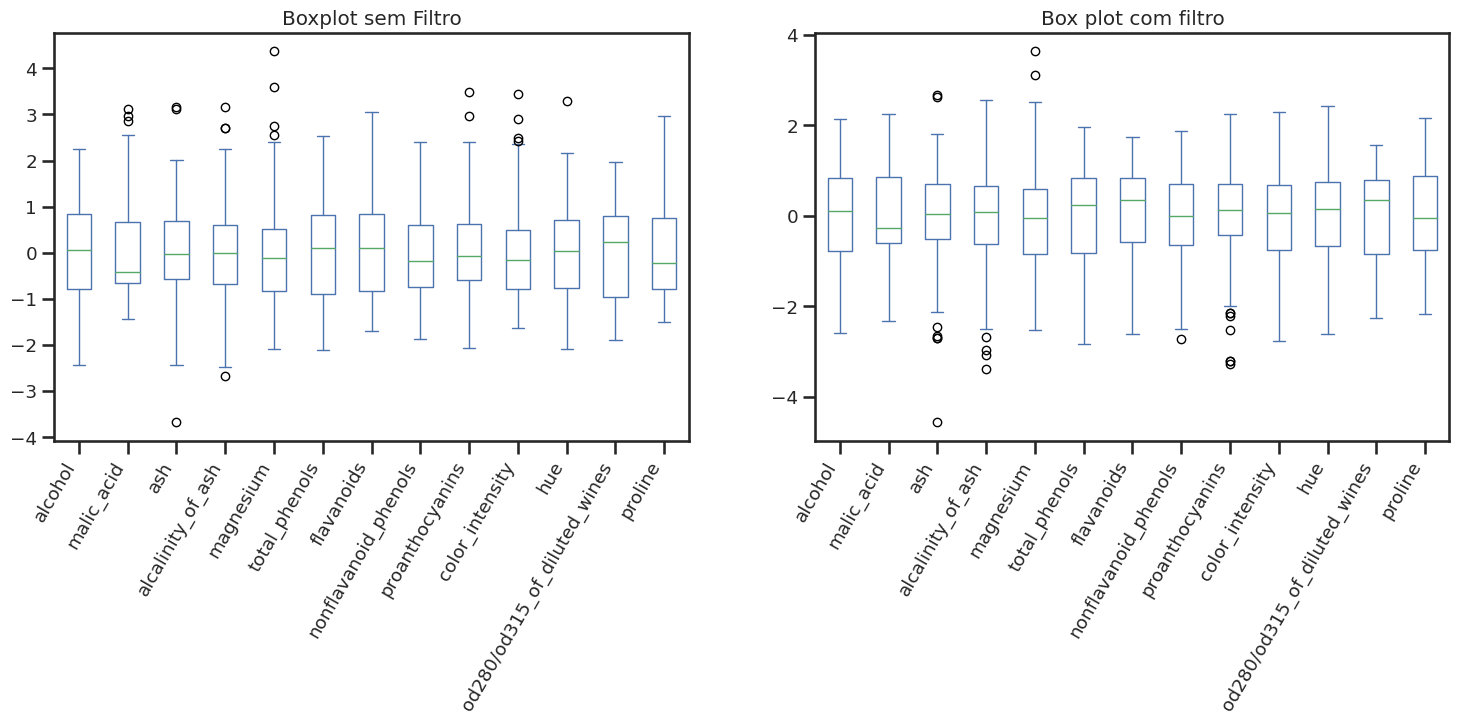

In [ ]:
# usando o filtro da transformação log
# Ficamos com menos colunas que estão apresentando outliers

df_Without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize= (18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem Filtro')
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Box plot com transformação log')

fig.autofmt_xdate(rotation=60, ha='right')

plt.show()

BOX-COX

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
power_transform(df[['ash']], method='box-cox')

array([[ 0.20965583],
       [-0.84042257],
       [ 1.12048779],
       [ 0.47151443],
       [ 1.90687536],
       [ 0.28414782],
       [ 0.28414782],
       [ 0.88935866],
       [-0.73446283],
       [-0.37675501],
       [-0.26810854],
       [-0.19533979],
       [ 0.13542548],
       [ 0.06145799],
       [ 0.02457322],
       [ 1.23689082],
       [ 1.31480096],
       [ 0.92772401],
       [ 0.39637369],
       [ 0.69847645],
       [-0.3406073 ],
       [ 1.04319542],
       [-0.0489976 ],
       [ 0.54691258],
       [ 0.88935866],
       [ 3.33976221],
       [ 0.92772401],
       [-0.84042257],
       [ 1.62888406],
       [-0.59220702],
       [ 1.23689082],
       [-0.0489976 ],
       [-0.0489976 ],
       [ 1.23689082],
       [ 1.04319542],
       [ 0.13542548],
       [ 1.78737706],
       [ 0.6604899 ],
       [-0.9807165 ],
       [ 0.5091814 ],
       [-0.23175783],
       [-0.91071098],
       [ 0.81281645],
       [-0.30439176],
       [-0.9807165 ],
       [ 0

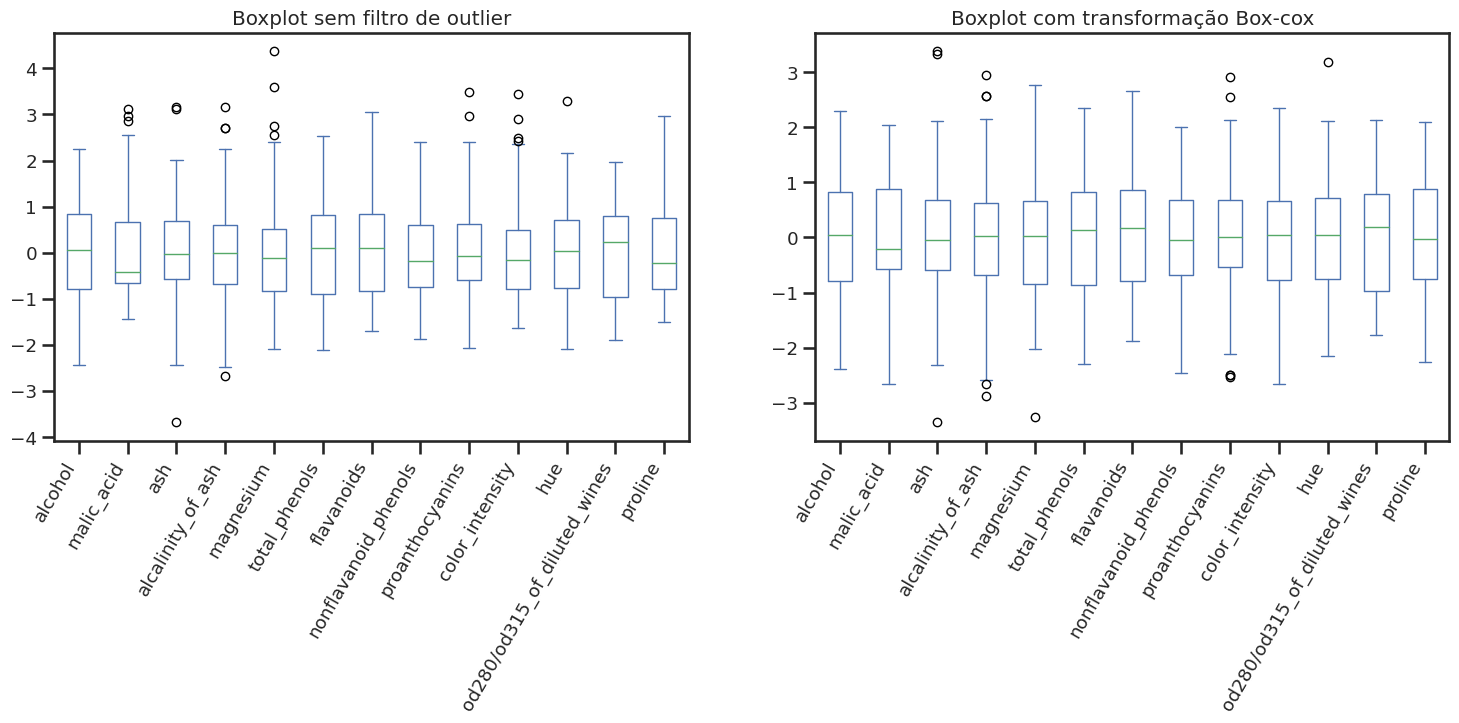

In [ ]:
df_boxbox = pd.DataFrame(power_transform(df, method='box-cox'), columns=df.columns)

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_boxbox.plot.box(ax=axes[1], title='Boxplot com transformação Box-cox')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

# Tratamento de datas

Para que o Python/Pandas reconheça que estamos trabalhando com o tipo de dado no formato data (`date` ou `datetime`), precisamos especificar este formato, para que assim possamos usufruir das diversas funções que lidam com este tipo de dado.

Para mostrar como podemos fazer essa conversão em uma tabela, iremos utilizar como exemplo dados de acidentes aéreos, neste momento selecionando apenas as colunas de data, que por padrão é lida como texto, e das fatalidades:

In [ ]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date', 'Fatalities']).dropna()
print(df.shape)
df.head()

(5256, 2)


,Date,Fatalities
0,09/17/1908,1.0
1,07/12/1912,5.0
2,08/06/1913,1.0
3,09/09/1913,14.0
4,10/17/1913,30.0


In [ ]:
# Tipos de dados
df.info()

# podemos ver que date está como obsjeto o correto é ser data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5256 non-null   object 
 1   Fatalities  5256 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.2+ KB


In [ ]:
# Formatando o tipo da coluna para data direto da importação

df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date', 'Fatalities'], parse_dates=['Date']).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [ ]:
# Usar esse padrão de data, YY/MM/DD
df.head()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0


Outra opção é converter o data type das colunas que representam data:

In [ ]:
# Podemos permitir que o pandas infira automaticamente o formato da data se possível (padrão do Pandas)0

# pd.to_datetime(df.Date)

df['Date'].astype('datetime64[ns]')

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [ ]:
df.head(1)

,Date,Fatalities
0,09/17/1908,1.0


In [ ]:
# Especificando o formato (para dataset grande costuma ser inclusive mais rápido)
# Dessa forma estamos passando o formato que está sendo usado e o pandas vai converter com base nesse formato.
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.head(1)

,Date,Fatalities
0,1908-09-17,1.0


Observe que podemos permitir ou não que o pandas faça a inferência do formato da data, contudo, é uma boa prática que especifiquemos o formato sempre que possível. Inclusive, para um grande volume de dados a conversão com espefificação tende a ser mais rápida.

Todos os símbolos dos formatos podem ser encontrados [neste link da documentação oficial do Python](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

Uma vez que a coluna de data esteja no formato certo, podemos utilizar o método `dt` do Pandas para acessar muitas funcionalidades úteis das datas/horários. Vide conjunto de funcionalidades na [documentação oficial](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html).

In [ ]:
# Mostrando todos atributos e funções acessíveis pelo método dt
df['Date'].dt.

NameError: ignored

In [ ]:
df['Date'].dt.day_name()

0        Thursday
1          Friday
2       Wednesday
3         Tuesday
4          Friday
          ...    
5263    Wednesday
5264      Tuesday
5265       Monday
5266       Sunday
5267       Monday
Name: Date, Length: 5256, dtype: object

Podemos colocar a data como índice no dataframe, e com isso acessar ainda mais funcionalidades ([vide documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)), como filtros mais efetivos e  agrupamentos inteligentes de períodos de tempo que será visto em conjunto com o `groupby` mais adiante.

In [ ]:
# Adicionando a data como index e ordenando-as

df_index = df.set_index('Date').sort_index()
df_index

,Fatalities
Date,
1908-09-17,1.0
1912-07-12,5.0
1913-08-06,1.0
1913-09-09,14.0
1913-10-17,30.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


In [ ]:
# Filtrando do ano 2000 até o mês de maio de 2005
# Somente com o date no index que isso da certo

df_index.loc['2000-05-10':'2003-08']

,Fatalities
Date,
2000-05-10,6.0
2000-05-17,3.0
2000-05-21,19.0
2000-05-25,1.0
2000-05-25,1.0
...,...
2003-08-04,2.0
2003-08-08,1.0
2003-08-20,20.0


In [ ]:
# Agrupando por mês e somando as fatalidades

df_index.resample('M').sum()

ImportError: ignored

# Rolling Filters

In [ ]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').sum().sort_index()
df_monthly.head()

,Fatalities
Date,
1908-09-30,1.0
1908-10-31,0.0
1908-11-30,0.0
1908-12-31,0.0
1909-01-31,0.0


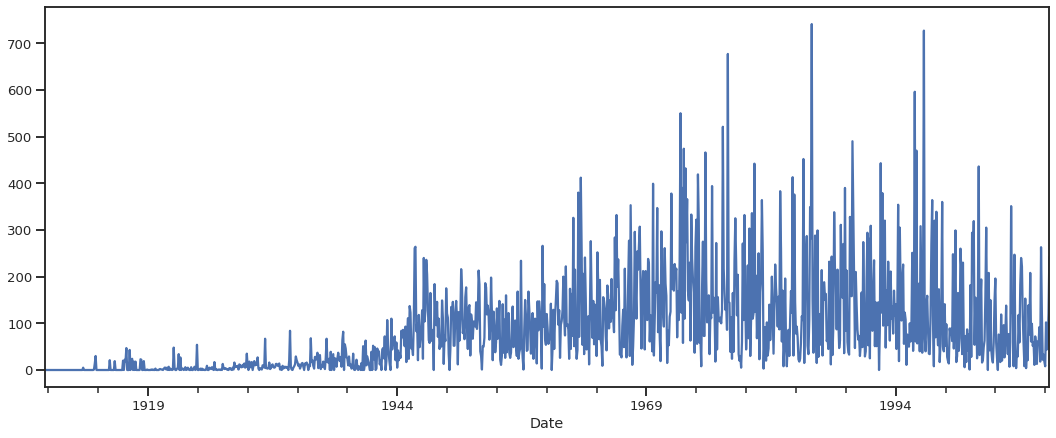

In [ ]:
# Plot sem tratamento de ruídos com rolling filter
plt.figure(figsize=(18,7))
df_monthly.Fatalities.plot();

In [ ]:
df_monthly.Fatalities.rolling(3).mean()

Date
1908-09-30           NaN
1908-10-31           NaN
1908-11-30      0.333333
1908-12-31      0.000000
1909-01-31      0.000000
                 ...    
2009-02-28     42.666667
2009-03-31     51.333333
2009-04-30     70.333333
2009-05-31     76.333333
2009-06-30    142.333333
Freq: M, Name: Fatalities, Length: 1210, dtype: float64

In [ ]:
@interact(window_size=(12,121,12))
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

interactive(children=(IntSlider(value=60, description='window_size', max=121, min=12, step=12), Output()), _do…

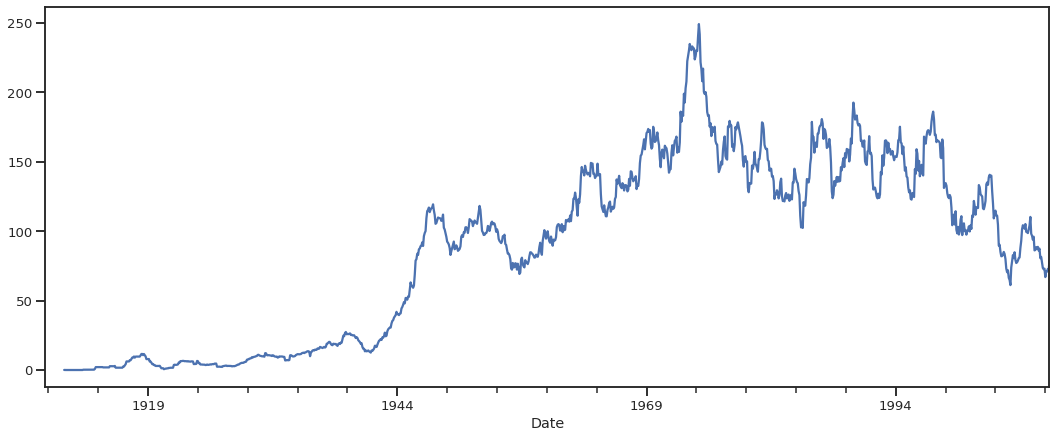

In [ ]:
rolling_mean(24)